In [2]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
%matplotlib inline


In [3]:
#Offshore Surface 
#Rainy 02-02-19
#Windy 03-01-19
#RnW 1-05-19
#Calm 01-01-19

data_url_1 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/02/OO-HYEA1--YDH-2019-02-02T08:15:32.634563.mseed'
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/01/OO-HYEA1--YDH-2019-03-01T00:00:00.000015.mseed'
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/05/OO-HYEA1--YDH-2019-01-05T02:15:40.155563.mseed'
data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:15:23.582250.mseed'

#shelf Surface 
#Rainy 04-05-19
#Windy 07-01-19
#RnW 1-13-20
#Calm 07-02-19
data_url_5 ='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/04/04/OO-HYEA2--YDH-2019-04-04T00:00:00.000000.mseed'
data_url_6 ='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/01/OO-HYEA2--YDH-2019-07-01T00:00:00.155563.mseed'
data_url_7 ='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2020/01/13/OO-HYEA2--YDH-2020-01-13T20:12:10.956000.mseed'
data_url_8 ='https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/07/02/OO-HYEA2--YDH-2019-07-02T00:00:00.131250.mseed'

In [4]:
st1 = read(data_url_1)
st2 = read(data_url_2)
st3 = read(data_url_3)
st4 = read(data_url_4)
st5 = read(data_url_5)
st6 = read(data_url_6)
st7 = read(data_url_7)
st8 = read(data_url_8)

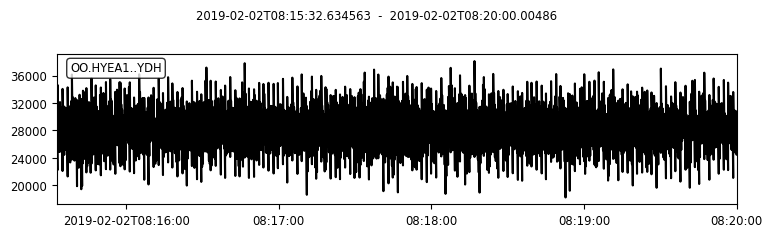

In [5]:
st1[0].plot()

In [6]:
def freq(x):
    return x[0].stats.sampling_rate
fs1=freq(st1)
fs2=freq(st2)
fs3=freq(st3)
fs4=freq(st4)
fs5=freq(st5)
fs6=freq(st6)
fs7=freq(st7)
fs8=freq(st8)


In [7]:
fs=fs1

In [8]:
t_start=st1[0].stats.starttime 
t_end=st1[0].stats.starttime + 5
sliced1=st1.slice(t_start, t_end)
    
t_start=st2[0].stats.starttime 
t_end=st2[0].stats.starttime + 5
sliced2=st2.slice(t_start, t_end)

t_start=st3[0].stats.starttime 
t_end=st3[0].stats.starttime + 5
sliced3=st3.slice(t_start, t_end)

t_start=st4[0].stats.starttime 
t_end=st4[0].stats.starttime + 5
sliced4=st4.slice(t_start, t_end)
    
t_start=st5[0].stats.starttime 
t_end=st5[0].stats.starttime + 5
sliced5=st5.slice(t_start, t_end)    

t_start=st6[0].stats.starttime 
t_end=st6[0].stats.starttime + 5
sliced6=st6.slice(t_start, t_end)    

t_start=st7[0].stats.starttime 
t_end=st7[0].stats.starttime + 5
sliced7=st7.slice(t_start, t_end)    

t_start=st8[0].stats.starttime 
t_end=st8[0].stats.starttime + 5
sliced8=st8.slice(t_start, t_end)    



Text(0.5, 1.0, 'OS Rainy')

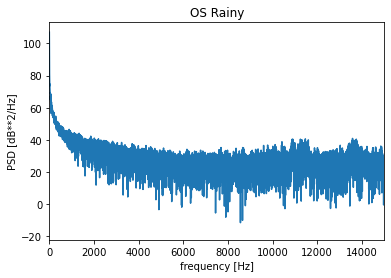

In [10]:
from scipy.fftpack import fft
x1 = (sliced1[0].data)*np.hanning(len(sliced1[0].data))
xfft1 = 2*np.square(fft(x1,64000))/(len(x1)*fs1)
fre1 = np.linspace(1,fs1,64000)
data_db1 = 10*np.log10(np.abs(xfft1))+169-128.9
plt.plot(fre1[0:32000], data_db1[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('OS Rainy')

Text(0.5, 1.0, 'OS Windy')

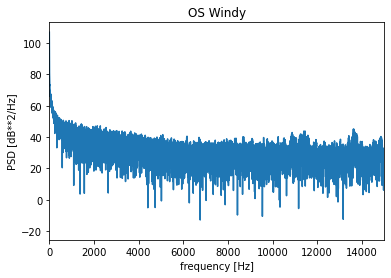

In [171]:
x2 = (sliced2[0].data)*np.hanning(len(sliced2[0].data))
xfft2 = 2*np.square(fft(x2,64000))/(len(x2)*fs2)
fre2 = np.linspace(1,fs2,64000)
data_db2 = 10*np.log10(np.abs(xfft2))+169-128.9
plt.plot(fre2[0:32000], data_db2[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('OS Windy')

Text(0.5, 1.0, 'OS Rain and Wind')

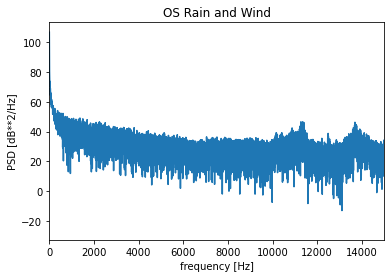

In [172]:

x3 = (sliced3[0].data)*np.hanning(len(sliced3[0].data))
xfft3 = 2*np.square(fft(x3,64000))/(len(x3)*fs3)
fre3 = np.linspace(1,fs3,64000)
data_db = 10*np.log10(np.abs(xfft3))+169-128.9
plt.plot(fre3[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('OS Rain and Wind')

Text(0.5, 1.0, 'OS Calm')

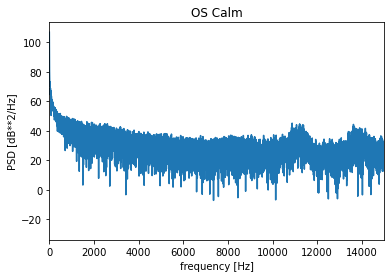

In [173]:
x4 = (sliced4[0].data)*np.hanning(len(sliced4[0].data))
xfft4 = 2*np.square(fft(x4,64000))/(len(x4)*fs4)
fre4 = np.linspace(1,fs4,64000)
data_db4 = 10*np.log10(np.abs(xfft4))+169-128.9
plt.plot(fre4[0:32000], data_db4[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('OS Calm')

Text(0.5, 1.0, 'SS Rainy')

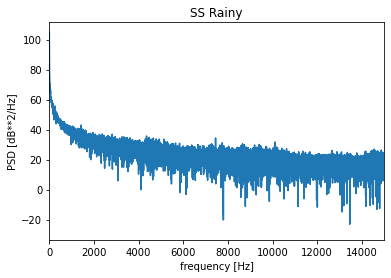

In [174]:
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('SS Rainy')

Text(0.5, 1.0, 'SS Windy')

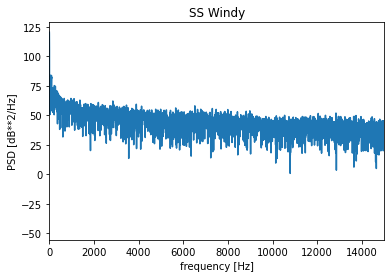

In [175]:
x6 = (sliced6[0].data)*np.hanning(len(sliced6[0].data))
xfft6 = 2*np.square(fft(x6,64000))/(len(x6)*fs6)
fre6 = np.linspace(1,fs6,64000)
data_db6 = 10*np.log10(np.abs(xfft6))+169-128.9
plt.plot(fre6[0:32000], data_db6[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('SS Windy')

Text(0.5, 1.0, 'SS Rain and Wind')

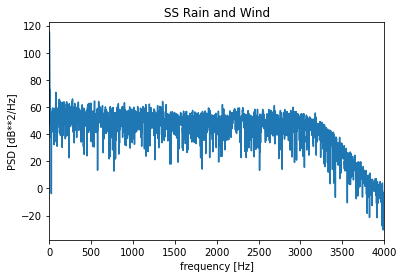

In [176]:
x7 = (sliced7[0].data)*np.hanning(len(sliced7[0].data))
xfft7 = 2*np.square(fft(x7,64000))/(len(x7)*fs7)
fre7 = np.linspace(1,fs7,64000)
data_db7 = 10*np.log10(np.abs(xfft7))+169-128.9
plt.plot(fre7[0:32000], data_db7[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,4000)
plt.title('SS Rain and Wind')

Text(0.5, 1.0, 'SSCalm')

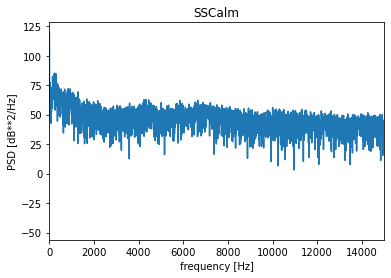

In [11]:
x8 = (sliced8[0].data)*np.hanning(len(sliced8[0].data))
xfft8 = 2*np.square(fft(x8,64000))/(len(x8)*fs8)
fre8 = np.linspace(1,fs8,64000)
data_db8 = 10*np.log10(np.abs(xfft8))+169-128.9
plt.plot(fre8[0:32000], data_db8[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)
plt.title('SSCalm')

In [206]:
data_url_whale='https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T19:50:00.000015.mseed'
stwhale=read(data_url_whale)


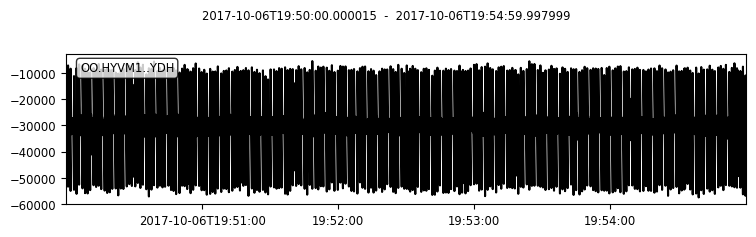

In [211]:
stwhale.plot()

In [214]:
t_start = stwhale[0].stats.starttime 
t_end = stwhale[0].stats.starttime + 5
slicedw = stwhale.slice(t_start, t_end)
slicedw

1 Trace(s) in Stream:
OO.HYVM1..YDH | 2017-10-06T19:50:00.000015Z - 2017-10-06T19:50:05.000015Z | 64000.0 Hz, 320001 samples

# Plot Spectrogram

4000


Text(0.5, 1.0, 'Mammal')

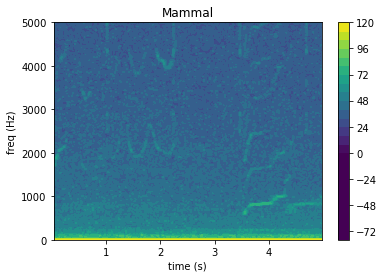

In [219]:
npts = len(slicedw[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(slicedw[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)
plt.title('Mammal')

In [216]:
data_url_ag='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:05:00.000016.mseed'
stag=read(data_url_whale)


4000


Text(0.5, 1.0, 'Airgun')

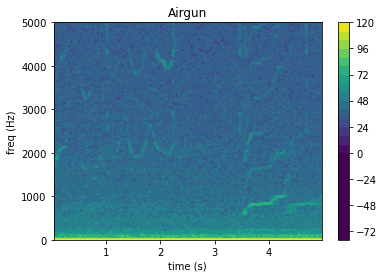

In [220]:
t_start = stag[0].stats.starttime 
t_end = stag[0].stats.starttime + 5
slicedag = stag.slice(t_start, t_end)
npts = len(slicedag[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(slicedw[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)
plt.title('Airgun')

In [221]:
data_url_ve='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2015/09/05/OO-AXVM1--YDH.2015-09-05T00:00:00.000000.mseed'
stve=read(data_url_whale)


4000


Text(0.5, 1.0, 'Earthquake or Volcanic Eruption')

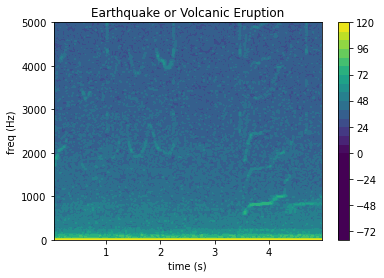

In [222]:
t_start = stve[0].stats.starttime 
t_end = stve[0].stats.starttime + 5
slicedve = stve.slice(t_start, t_end)

npts = len(slicedve[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(slicedw[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)
plt.title('Earthquake or Volcanic Eruption')